<a href="https://colab.research.google.com/github/vtf05/synthetic_data_gen/blob/main/synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')



KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
root_path = 'gdrive/My Drive/synthetic_data_generation/' # put your folder name inplace of synthetic data generation


In [5]:
!wget https://synthetichealth.github.io/synthea-sample-data/downloads/synthea_sample_data_csv_apr2020.zip


--2021-09-07 11:34:29--  https://synthetichealth.github.io/synthea-sample-data/downloads/synthea_sample_data_csv_apr2020.zip
Resolving synthetichealth.github.io (synthetichealth.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to synthetichealth.github.io (synthetichealth.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8982431 (8.6M) [application/zip]
Saving to: ‘synthea_sample_data_csv_apr2020.zip’

synthea_sample_data 100%[===================>]   8.57M  --.-KB/s    in 0.07s   

2021-09-07 11:34:30 (118 MB/s) - ‘synthea_sample_data_csv_apr2020.zip’ saved [8982431/8982431]



In [6]:
!unzip synthea_sample_data_csv_apr2020.zip

Archive:  synthea_sample_data_csv_apr2020.zip
   creating: csv/
  inflating: csv/medications.csv     
  inflating: csv/providers.csv       
  inflating: csv/payer_transitions.csv  
  inflating: csv/imaging_studies.csv  
  inflating: csv/supplies.csv        
  inflating: csv/payers.csv          
  inflating: csv/allergies.csv       
  inflating: csv/procedures.csv      
  inflating: csv/organizations.csv   
  inflating: csv/conditions.csv      
  inflating: csv/careplans.csv       
  inflating: csv/encounters.csv      
  inflating: csv/devices.csv         
  inflating: csv/immunizations.csv   
  inflating: csv/patients.csv        
  inflating: csv/observations.csv    


In [22]:
import pandas as pd
df = pd.read_csv('csv/patients.csv')


In [23]:
df.head

<bound method NDFrame.head of                                         Id  ... HEALTHCARE_COVERAGE
0     1d604da9-9a81-4ba9-80c2-de3375d59b40  ...             1334.88
1     034e9e3b-2def-4559-bb2a-7850888ae060  ...             3204.49
2     10339b10-3cd1-4ac3-ac13-ec26728cb592  ...             2606.40
3     8d4c4326-e9de-4f45-9a4c-f8c36bff89ae  ...             8756.19
4     f5dcd418-09fe-4a2f-baa0-3da800bd8c3a  ...             3772.20
...                                    ...  ...                 ...
1166  023a7d29-32b3-4db5-89c8-b88bd7582ec0  ...            32086.31
1167  1fc8dafd-90e5-44d6-9179-81156c0ea083  ...             3130.52
1168  6d048a56-edb8-4f29-891d-7a84d75a8e78  ...            52391.24
1169  fca3178e-fb68-41c3-8598-702d3ca68b96  ...            13157.00
1170  fc817953-cc8b-45db-9c85-7c0ced8fa90d  ...            26565.65

[1171 rows x 25 columns]>

In [24]:
df.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'LAST', 'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY',
       'GENDER', 'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP',
       'LAT', 'LON', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')

In [25]:
df.drop(['Id', 'BIRTHDATE', 'DEATHDATE', 'SSN', 'DRIVERS', 'PASSPORT', 'PREFIX',
       'FIRST', 'ADDRESS', 'LAST', 'SUFFIX', 'MAIDEN','LAT', 'LON',], axis=1, inplace=True)

# droping these columns because we dont need such values that will not be making impact in our neural network


In [27]:
df['MARITAL'] # as we can see here some of these values are categorical and non integers so we need to convert them to the integers


0         M
1         M
2         M
3         M
4       NaN
       ... 
1166      M
1167      S
1168      S
1169      M
1170      M
Name: MARITAL, Length: 1171, dtype: object

In [28]:
df["MARITAL"] = df["MARITAL"].astype('category').cat.codes
df["RACE"] = df["RACE"].astype('category').cat.codes
df["ETHNICITY"] = df["ETHNICITY"].astype('category').cat.codes
df["GENDER"] = df["GENDER"].astype('category').cat.codes
df["BIRTHPLACE"] = df["BIRTHPLACE"].astype('category').cat.codes
df["CITY"] = df["CITY"].astype('category').cat.codes
df["STATE"] = df["STATE"].astype('category').cat.codes
df["COUNTY"] = df["COUNTY"].astype('category').cat.codes
df["ZIP"] = df["ZIP"].astype('category').cat.codes


In [14]:
df.head()


,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,ZIP,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,0,4,0,1,136,42,0,6,2,271227.08,1334.88
1,0,4,1,1,61,186,0,8,132,793946.01,3204.49
2,0,4,1,1,236,42,0,6,3,574111.90,2606.40
3,0,4,1,0,291,110,0,8,68,935630.30,8756.19
4,-1,4,1,1,189,24,0,12,125,598763.07,3772.20


In [29]:
HEALTHCARE_EXPENSES_MIN = df["HEALTHCARE_EXPENSES"].min()
HEALTHCARE_EXPENSES_MAX = df["HEALTHCARE_EXPENSES"].max()
print('Min and max healthcare expense', HEALTHCARE_EXPENSES_MIN, HEALTHCARE_EXPENSES_MAX)

HEALTHCARE_COVERAGE_MIN = df["HEALTHCARE_COVERAGE"].min()
HEALTHCARE_COVERAGE_MAX = df["HEALTHCARE_COVERAGE"].max()

print('Min and max healthcare coverage', HEALTHCARE_COVERAGE_MIN, HEALTHCARE_COVERAGE_MAX)


# here we are trying to find minimum and max value of healthcare_coverage and healthcare_expense 
# we will be encoding these to continuous features using pd.cut method



Min and max healthcare expense 1822.1600000000005 2145924.400000002
Min and max healthcare coverage 0.0 927873.5300000022


In [30]:
# here we can say we are trying to rescale the feature values
# we have used pd.cut method that will help use rescale values in the bin
import numpy as np

df_healthcare_expenses = pd.cut(df['HEALTHCARE_EXPENSES'], bins=np.linspace(HEALTHCARE_EXPENSES_MIN, HEALTHCARE_EXPENSES_MAX, 21), labels=False)
df_healthcare_coverage = pd.cut(df['HEALTHCARE_COVERAGE'], bins=np.linspace(HEALTHCARE_COVERAGE_MIN, HEALTHCARE_COVERAGE_MAX, 21), labels=False)
print(df.columns)
df.drop(["HEALTHCARE_EXPENSES", "HEALTHCARE_COVERAGE"], axis=1, inplace=True)

df = pd.concat([df, df_healthcare_expenses, df_healthcare_coverage], axis=1)

Index(['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CITY', 'STATE',
       'COUNTY', 'ZIP', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')


In [31]:
df.columns

Index(['MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'CITY', 'STATE',
       'COUNTY', 'ZIP', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'],
      dtype='object')

In [32]:
from sklearn.preprocessing import PowerTransformer

df[df.columns] = PowerTransformer(method='yeo-johnson', standardize=True, copy=True).fit_transform(df[df.columns])

print(df) # here we are transforming the dataset using powertransform to find gausian distribution of it

       MARITAL      RACE  ...  HEALTHCARE_EXPENSES  HEALTHCARE_COVERAGE
0     0.334507  0.461541  ...            -0.819522            -0.187952
1     0.334507  0.461541  ...             0.259373            -0.187952
2     0.334507  0.461541  ...            -0.111865            -0.187952
3     0.334507  0.461541  ...             0.426979            -0.187952
4    -1.275676  0.461541  ...            -0.111865            -0.187952
...        ...       ...  ...                  ...                  ...
1166  0.334507 -2.207146  ...             1.398831            -0.187952
1167  1.773476  0.461541  ...             0.585251            -0.187952
1168  1.773476  0.461541  ...             1.275817             5.320497
1169  0.334507  0.461541  ...             1.016430            -0.187952
1170  0.334507  0.461541  ...             1.275817            -0.187952

[1171 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


We will be using a GAN network that comprises of an generator and discriminator that tries to beat each other and in the process learns the vector embedding for the data.

In [33]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model

from tensorflow.keras.optimizers import Adam


In [39]:

class GAN():
    
    def __init__(self, gan_args):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim] = gan_args

        self.generator = Generator(self.batch_size).\
            build_model(input_shape=(self.noise_dim,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator(self.batch_size).\
            build_model(input_shape=(self.data_dim,), dim=layers_dim)

        optimizer = Adam(lr, 0.5)

        # Build and compile the discriminator
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.noise_dim,))
        record = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(record)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)





    def get_data_batch(self, train, batch_size, seed=0):
        # # random sampling - some samples will have excessively low or high sampling, but easy to implement
        # np.random.seed(seed)
        # x = train.loc[ np.random.choice(train.index, batch_size) ].values
        # iterate through shuffled indices, so every sample gets covered evenly

        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train))  # wasteful to shuffle every time
        train_ix = list(train_ix) + list(train_ix)  # duplicate to cover ranges past the end of the set
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))
        
    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments
        
        data_cols = data.columns

        # Adversarial ground truths
        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))

        for epoch in range(epochs):    
            # ---------------------
            #  Train Discriminator
            # ---------------------
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            # Generate a batch of new images
            gen_data = self.generator.predict(noise)
    
            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(batch_data, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_data, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
            # ---------------------
            #  Train Generator
            # ---------------------
            noise = tf.random.normal((self.batch_size, self.noise_dim))
            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)
    
            # Plot the progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
    
            # If at save interval => save generated events
            if epoch % sample_interval == 0:
                #Test here data generation step
                # save model checkpoints
                model_checkpoint_base_name = 'model/' + cache_prefix + '_{}_model_weights_step_{}.h5'
                self.generator.save_weights(model_checkpoint_base_name.format('generator', epoch))
                self.discriminator.save_weights(model_checkpoint_base_name.format('discriminator', epoch))

                #Here is generating the data
                z = tf.random.normal((432, self.noise_dim))
                gen_data = self.generator(z)
                print('generated_data')

    def save(self, path, name):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        model_path = os.path.join(path, name)
        self.generator.save_weights(model_path)  # Load the generator
        return
    
    def load(self, path):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        self.generator = Generator(self.batch_size)
        self.generator = self.generator.load_weights(path)
        return self.generator
    
class Generator():
    def __init__(self, batch_size):
        self.batch_size=batch_size
        
    def build_model(self, input_shape, dim, data_dim):
        input= Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim, activation='relu')(input)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dense(dim * 4, activation='relu')(x)
        x = Dense(data_dim)(x)
        return Model(inputs=input, outputs=x)

class Discriminator():
    def __init__(self,batch_size):
        self.batch_size=batch_size
    
    def build_model(self, input_shape, dim):
        input = Input(shape=input_shape, batch_size=self.batch_size)
        x = Dense(dim * 4, activation='relu')(input)
        x = Dropout(0.1)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim, activation='relu')(x)
        x = Dense(1, activation='sigmoid')(x)
        return Model(inputs=input, outputs=x)

In [35]:
# TRAINING THE MODEL INTO THE DATASET
data_cols = df.columns

In [36]:
noise_dim = 32
dim = 128
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'model'

df[data_cols] = df[data_cols]

print(df.shape[1])

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = ['', epochs, log_step]

11


In [37]:
!mkdir model

In [40]:
model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
synthesizer.train(df, train_args)

Streaming output truncated to the last 5000 lines.
51 [D loss: 0.298487, acc.: 93.75%] [G loss: 2.002388]
52 [D loss: 0.283706, acc.: 92.19%] [G loss: 1.620789]
53 [D loss: 0.289395, acc.: 90.62%] [G loss: 1.614190]
54 [D loss: 0.274862, acc.: 96.88%] [G loss: 1.594487]
55 [D loss: 0.238061, acc.: 98.44%] [G loss: 1.538890]
56 [D loss: 0.264091, acc.: 98.44%] [G loss: 1.487453]
57 [D loss: 0.236096, acc.: 100.00%] [G loss: 1.491890]
58 [D loss: 0.261767, acc.: 96.88%] [G loss: 1.432581]
59 [D loss: 0.318775, acc.: 89.06%] [G loss: 1.529617]
60 [D loss: 0.319053, acc.: 89.06%] [G loss: 1.627786]
61 [D loss: 0.418196, acc.: 76.56%] [G loss: 2.145474]
62 [D loss: 0.309678, acc.: 89.06%] [G loss: 2.066713]
63 [D loss: 0.341699, acc.: 92.19%] [G loss: 1.823791]
64 [D loss: 0.371629, acc.: 87.50%] [G loss: 1.875841]
65 [D loss: 0.314095, acc.: 92.19%] [G loss: 2.039091]
66 [D loss: 0.339417, acc.: 90.62%] [G loss: 1.984083]
67 [D loss: 0.292616, acc.: 92.19%] [G loss: 2.002519]
68 [D loss: 0

In [41]:
!mkdir model/gan
!mkdir model/gan/saved

In [42]:
#You can easily save the trained generator and loaded it aftwerwards

synthesizer.save('model/gan/saved', 'generator_patients')

In [43]:
synthesizer.generator.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(32, 32)]                0         
_________________________________________________________________
dense (Dense)                (32, 128)                 4224      
_________________________________________________________________
dense_1 (Dense)              (32, 256)                 33024     
_________________________________________________________________
dense_2 (Dense)              (32, 512)                 131584    
_________________________________________________________________
dense_3 (Dense)              (32, 11)                  5643      
Total params: 174,475
Trainable params: 174,475
Non-trainable params: 0
_________________________________________________________________


In [44]:
synthesizer.discriminator.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(32, 11)]                0         
_________________________________________________________________
dense_4 (Dense)              (32, 512)                 6144      
_________________________________________________________________
dropout (Dropout)            (32, 512)                 0         
_________________________________________________________________
dense_5 (Dense)              (32, 256)                 131328    
_________________________________________________________________
dropout_1 (Dropout)          (32, 256)                 0         
_________________________________________________________________
dense_6 (Dense)              (32, 128)                 32896     
_________________________________________________________________
dense_7 (Dense)              (32, 1)                   129 

**EVALUATION**

In [45]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

No handles with labels found to put in legend.


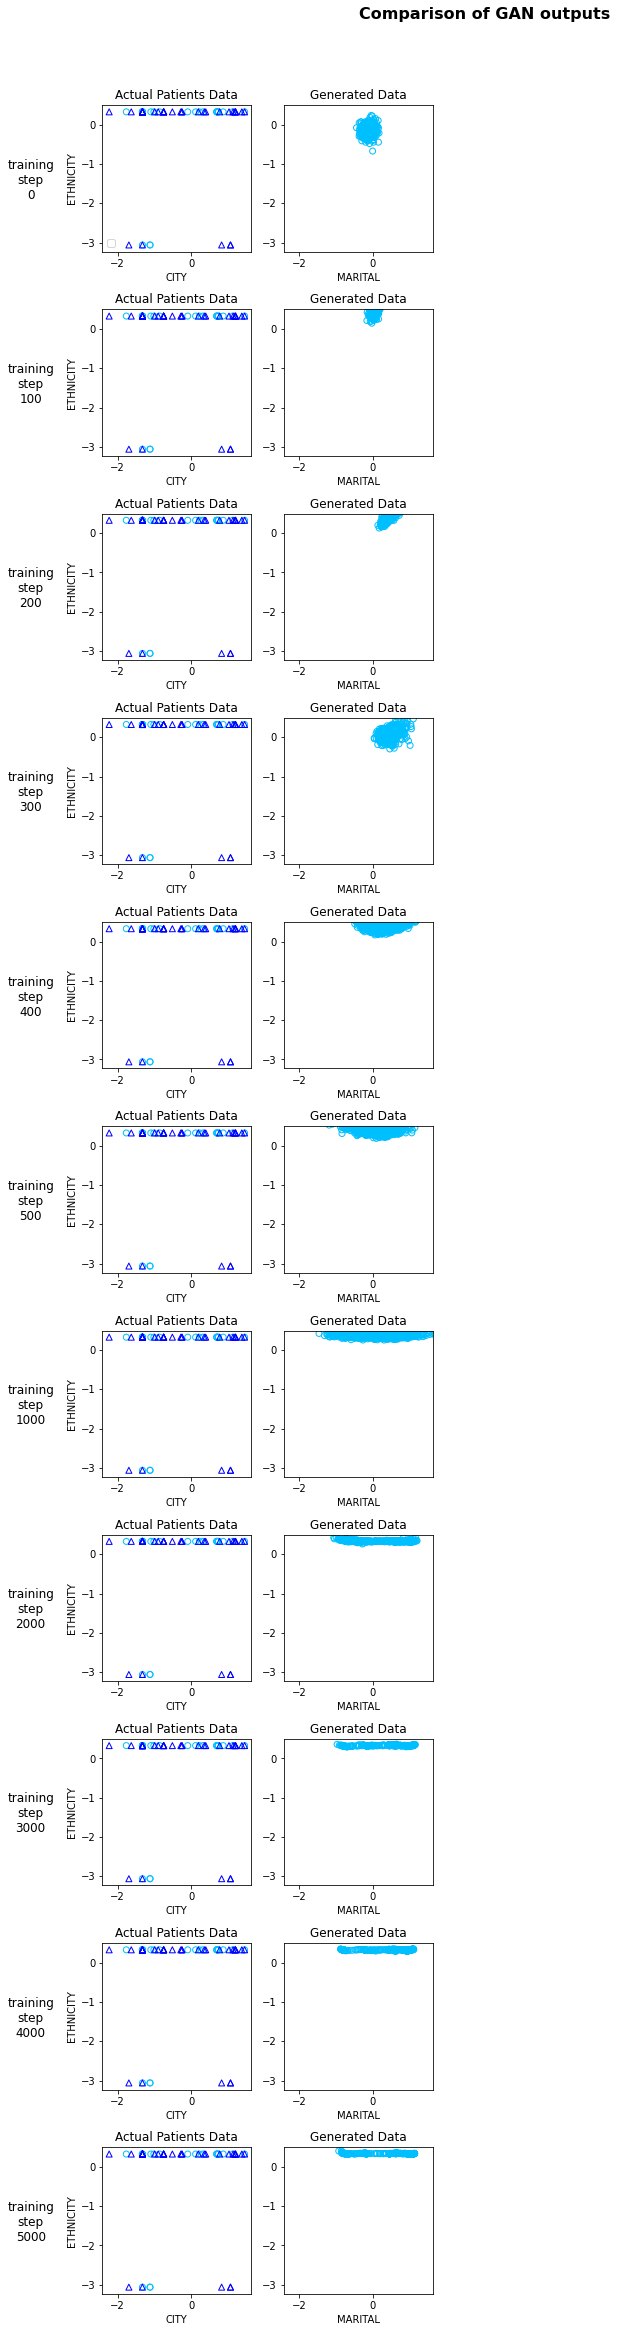

In [46]:
import matplotlib.pyplot as plt

# Setup parameters visualization parameters
seed = 17
test_size = 492 # number of fraud cases
noise_dim = 32

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real, columns=data_cols)

model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)

fig = plt.figure(figsize=(14,rows*3))

for model_step_ix, model_step in enumerate(model_steps):        
    axarr[model_step_ix] = plt.subplot(rows, columns, model_step_ix*columns + 1)
    
    for group, color, marker in zip(real_samples.groupby('RACE'), colors, markers):
        plt.scatter( group[1][[col1]], group[1][[col2]], marker=marker, edgecolors=color, facecolors='none' )
    
    plt.title('Actual Patients Data')
    plt.ylabel(col2) # Only add y label to left plot
    plt.xlabel(col1)
    xlims, ylims = axarr[model_step_ix].get_xlim(), axarr[model_step_ix].get_ylim()
    
    if model_step_ix == 0: 
        legend = plt.legend()
        legend.get_frame().set_facecolor('white')
    
    i=0
    [model_name, with_class, generator_model] = models['GAN']

    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')

    ax = plt.subplot(rows, columns, model_step_ix*columns + 1 + (i+1) )

    g_z = generator_model.predict(z)
    gen_samples = pd.DataFrame(g_z, columns=data_cols)
    gen_samples.to_csv('Generated_sample.csv')
    plt.scatter( gen_samples[[col1]], gen_samples[[col2]], marker=markers[0], edgecolors=colors[0], facecolors='none' )
    plt.title("Generated Data")   
    plt.xlabel(data_cols[0])
    ax.set_xlim(xlims), ax.set_ylim(ylims)

plt.suptitle('Comparison of GAN outputs', size=16, fontweight='bold')
plt.tight_layout(rect=[0.075,0,1,0.95])

# Adding text labels for traning steps
vpositions = np.array([ i._position.bounds[1] for i in axarr ])
vpositions += ((vpositions[0] - vpositions[1]) * 0.35 )
for model_step_ix, model_step in enumerate( model_steps ):
    fig.text( 0.05, vpositions[model_step_ix], 'training\nstep\n'+str(model_step), ha='center', va='center', size=12)

plt.savefig('Comparison_of_GAN_outputs.png')

In [47]:
!pip install table_evaluator


  Created wheel for table-evaluator: filename=table_evaluator-1.2.2.post1-py3-none-any.whl size=17051 sha256=e748de0581c019a857095383d91787e45268061298b287d2bb5a2769052ca5d9
  Stored in directory: /root/.cache/pip/wheels/45/c7/20/47a3f8b044d705f3c088d9577968a805dded4b83096fabd2ac
Successfully built table-evaluator


In [49]:
gen_samples.drop('Unnamed: 0', axis=1, inplace=True)
print(gen_df.columns)
print(df.shape, gen_samples.shape)

KeyError: ignored